In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from statsmodels.tsa.seasonal import seasonal_decompose

from core.data.file_processing import open_all_data, drop_na
from core.data.utils import iav_with_trend, trend
from core.visualizations import reg_results

from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [6]:
df = open_all_data()
variables = ['ENSO', 'CO2_gr_MLO', 'CO2_gr_SPO',
       'Pre_global', 'Pre_South', 'Pre_Tropics', 'Pre_North', 'Temp_gl',
       'Temp_sh', 'Temp_nh', 'land_sink_global', 'land_sink_North',
       'land_sink_Tropics', 'land_sink_South', 'ocean_sink_global',
       'ocean_sink_North', 'ocean_sink_Tropics', 'ocean_sink_South', 'ffco2_Global']
df = drop_na(df[variables])

There are 671 rows remaining out of an initial 752.


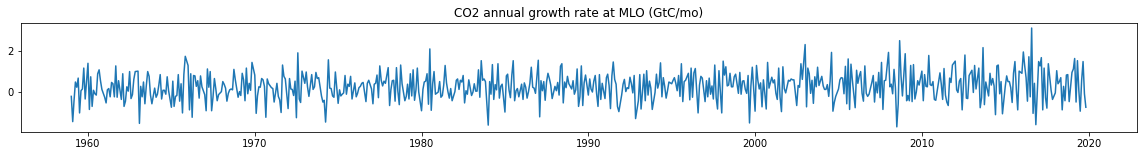

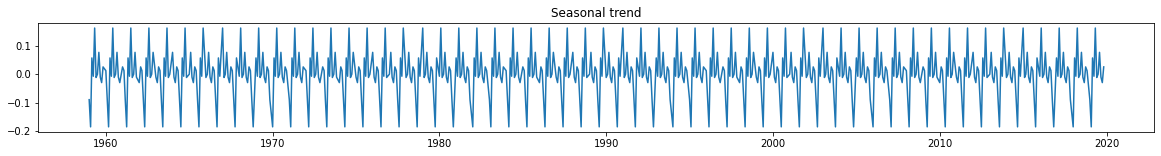

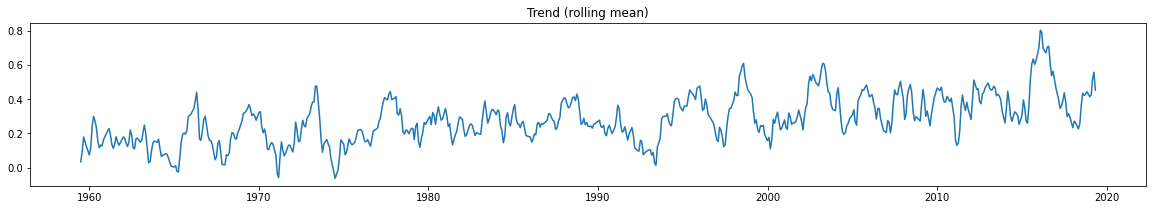

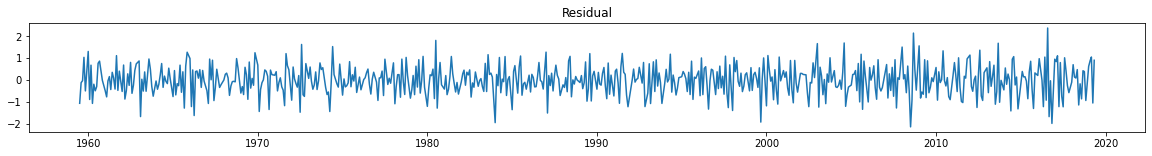

In [7]:
decompose_result = seasonal_decompose(df['CO2_gr_MLO'], model="additive", period=12)
plt.figure(figsize=(20,2))
plt.title("CO2 annual growth rate at MLO (GtC/mo)")
plt.plot(df['Date'], decompose_result.observed)
plt.show()

plt.figure(figsize=(20,2))
plt.title("Seasonal trend")
plt.plot(df['Date'], decompose_result.seasonal)
plt.show()

plt.figure(figsize=(20,3))
plt.title("Trend (rolling mean)")
plt.plot(df['Date'], decompose_result.trend)
plt.show()

plt.figure(figsize=(20,2))
plt.title("Residual")
plt.plot(df['Date'], decompose_result.resid)
plt.show()

In [8]:
df_iav_with_trend = iav_with_trend(df)
df_trend = trend(df)

In [9]:
def model_and_plot(df_show, independent_variables, dependent_variables):
    X = df_show[independent_variables]
    y = df_show[[dependent_variable]]
    reg = linear_model.LinearRegression()
    reg.fit(X, y)
    print(f"Model score: {reg.score(X, y)}")

    #reg_results(df_show, reg, X, y, dependent_variable)
    plt.figure(figsize=(20,5))
    plt.plot(df_show['Date'], reg.predict(X), label="Predicted")
    plt.plot(df_show['Date'], y, label="Actual")
    plt.legend()
    plt.title(f"Predicted and actual {dependent_variable} over time")
    plt.show()

Model score: 0.6521915003284663


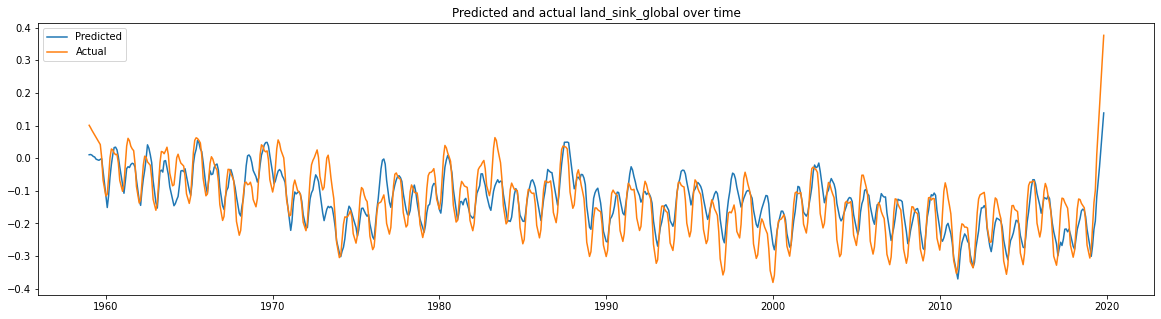

In [11]:
independent_variables = ['Pre_North', 
                         'Pre_South', 
                         'Pre_Tropics', 
                         'Temp_nh', 
                         'Temp_sh',
                         'ffco2_Global',
                         'ENSO',
                         'CO2_gr_MLO',
                         'CO2_gr_SPO'
                        ]
dependent_variable = 'land_sink_global'


model_and_plot(df_trend, independent_variables, dependent_variable)